In [1]:
!pip install numpy
!pip install matplotlib

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Handwritten digit recognition

In [4]:
mnist_dataset = tf.keras.datasets.mnist.load_data()

In [5]:
print(mnist_dataset)

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [11]:
mnist_dataset[0][1].shape

(60000,)

In [12]:
training_data, training_labels = mnist_dataset[0][0], mnist_dataset[0][1]
testing_data, testing_labels = mnist_dataset[1][0], mnist_dataset[1][1]
print(training_data)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


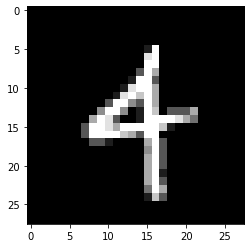

In [13]:
plt.imshow(training_data[6996], cmap='gray')

In [14]:
training_labels[1]

0

In [15]:
training_data[0].flatten().shape

(784,)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
train_labels = tf.keras.backend.one_hot(training_labels, num_classes=10)

In [19]:
train_labels[3]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [20]:
training_labels[3]

1

In [21]:
train_data = training_data/255.0

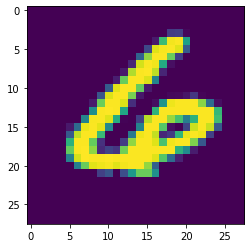

In [22]:
plt.imshow(train_data[759])

In [23]:
callbacks=[tf.keras.callbacks.TensorBoard()]

In [25]:
model.fit(train_data, training_labels, epochs=50, callbacks=callbacks, batch_size=32)

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0175 - accuracy: 0.9940
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0130 - accuracy: 0.9958
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0168 - accuracy: 0.9942
Epoch 4/50
1875/1875 [==============================] - 2s 1000us/step - loss: 0.0133 - accuracy: 0.9957
Epoch 5/50
1875/1875 [==============================] - 2s 995us/step - loss: 0.0117 - accuracy: 0.9961
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0125 - accuracy: 0.9958
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0121 - accuracy: 0.9960
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 9/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0110 - accuracy: 0.9962
Epoch 10/50
1875/1875 [==============================] - 2s 1ms/step - loss: 

In [2]:
plt.imshow(testing_data[759])

NameError: name 'plt' is not defined

In [19]:
model.predict(np.array([testing_data[759]]))

array([[-2.2640767e+03, -2.8842002e+03, -2.4897971e+03, -4.4953870e+02,
        -8.8045990e+02, -1.8932889e+03, -4.1918481e+03,  2.9579787e+00,
        -2.7062607e+02,  3.1556821e+03]], dtype=float32)

In [20]:
pred_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [21]:
pred_model.predict(np.array([testing_data[69]]))

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
!dir

 Volume in drive F is My
 Volume Serial Number is 52DD-10D0

 Directory of F:\CS\Neel

01-08-2020  12:05    <DIR>          .
01-08-2020  12:05    <DIR>          ..
01-08-2020  12:03    <DIR>          .ipynb_checkpoints
01-08-2020  12:04    <DIR>          logs
01-08-2020  12:05            12,173 NeelDadaJupyter.ipynb
               1 File(s)         12,173 bytes
               4 Dir(s)  256,584,884,224 bytes free
